Define `ufunc` and a Gaussian filter on `ScalarField` and `VectorField`
=======================================================================

In [1]:
import sys
sys.path.append("/home/smets/far/PHARE/pyphare/")
import os
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
import numpy as np
%matplotlib inline

In [2]:
Te = 0.2
run_path = "/home/smets/far/farMe/uFunc"+"/"+f"wp_{Te}"+"/"
files = os.listdir(run_path)

In [3]:
if 'ions_charge_density.h5' not in files :
    subprocess.call(['/usr/bin/python3', run_path+'wp1.py'])

In [4]:
print(files)

['ions_charge_density.h5', 'ions_bulkVelocity.h5', 'EM_E.h5', 'EM_B.h5', 'ions_pop_protons_domain.h5', 'wp1.py']


In [5]:
run  = Run(run_path)
time = 50.0

# Operation on `ScalarField`

In [6]:
N = run.GetNi(time)
P = run.GetPe(time)  # , all_primal=True)
type(P)

/home/smets/vEnv/phare/bin/python3: error while loading shared libraries: libpython3.7m.so.1.0: cannot open shared object file: No such file or directory


pyphare.pharesee.hierarchy.scalarfield.ScalarField

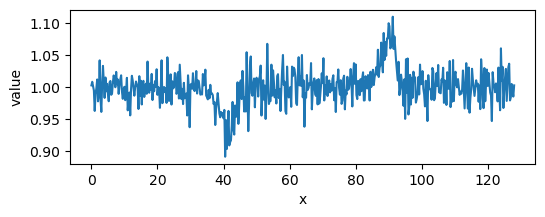

In [7]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', color='tab:blue')